# Bank_Personal_Loan_Modelling
## Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score


In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking data Type

In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


## Descriptive Statitstics of each Column

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### To check if there is a Null value in the Dataset

In [7]:
#To check if there is a Null value
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Plot showing how many customer that took loan

**Visualization the distribution of values in the 'Personal Loan' column using a bar plot, providing insights into the frequency of different loan categories in the dataset.**

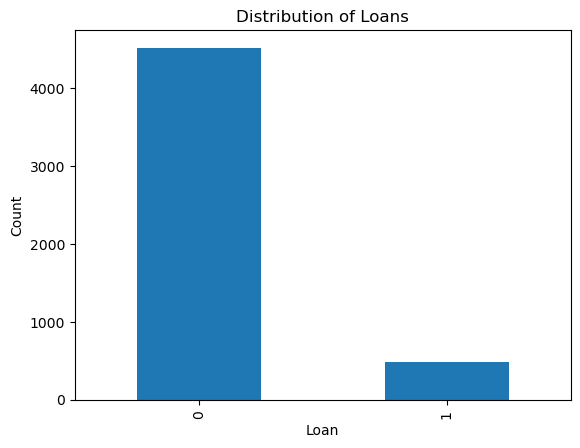

In [8]:
#Plot how many took the loan vs how many did not
df['Personal Loan'].value_counts().plot(kind='bar')
plt.title('Distribution of Loans')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

## Heatmap showing the correlation between all variables

**In this code segment we will generates a heatmap visualizing the correlation between numerical variables in the DataFrame, helping to identify patterns of association or dependence between different features.**

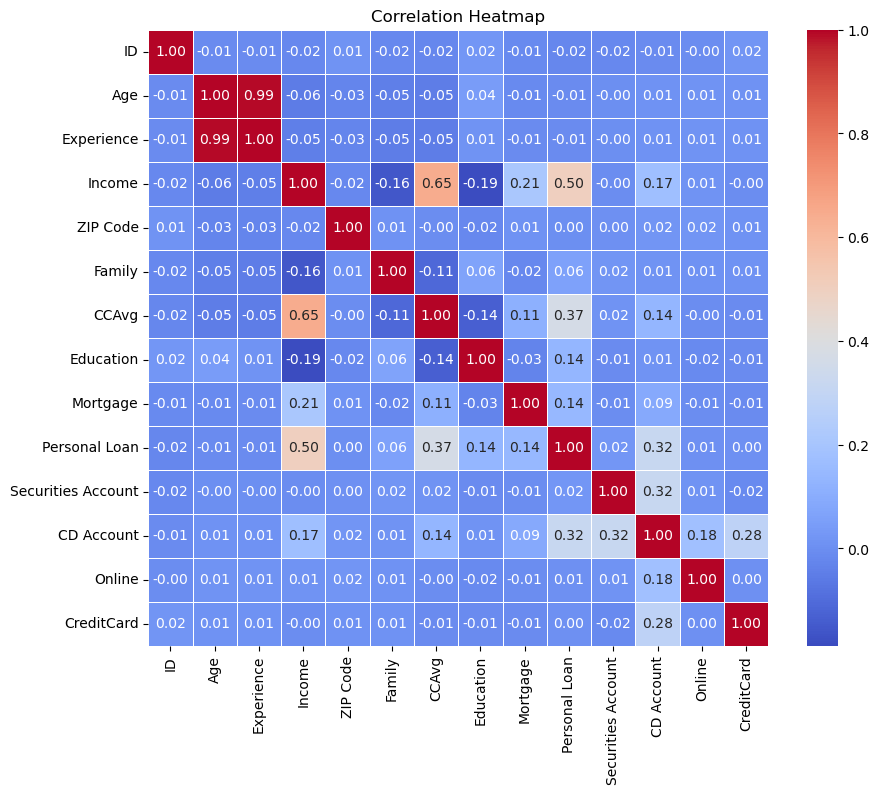

<Figure size 640x480 with 0 Axes>

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

### Plot to key Relationship between various Variable

**This code segment creates subplots to visualize the relationship between different variables (Income, Age, CCAvg) and the Personal Loan status in the DataFrame df.**

**Overall, this code segment creates a visually appealing analysis of the relationship between age, income, credit card average spending, and loan requests, with added features like legends and mean lines for better interpretation.**

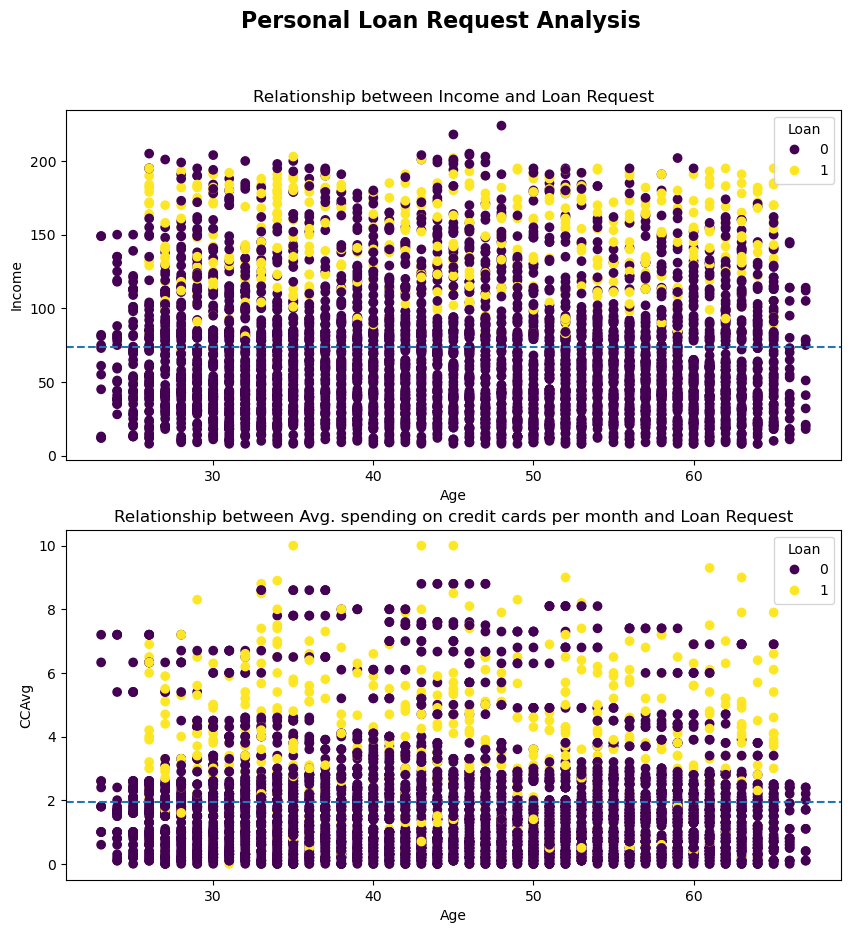

In [10]:
# change plot style from the default
# plt.style.use('default')

### subplots of Income, age, CCAvg

fig, (ax0, ax1) = plt.subplots(nrows = 2,ncols = 1,figsize = (10,10))
# Add data to ax0
scatter = ax0.scatter(x = df['Age'],y = df['Income'],c = df['Personal Loan'])

#Customize ax0
ax0.set(title = 'Relationship between Income and Loan Request',xlabel = 'Age',ylabel = 'Income')

# Add a legend
ax0.legend(*scatter.legend_elements(), title = 'Loan')

#Add a mean line
ax0.axhline(y = df['Income'].mean(),linestyle = '--')

## -------

#Add data to ax1
scatter1 = ax1.scatter(x = df['Age'],y = df['CCAvg'],c = df['Personal Loan'])

#Customize ax1
ax1.set(title = 'Relationship between Avg. spending on credit cards per month and Loan Request',xlabel = 'Age',ylabel = 'CCAvg')

# Add a legend
ax1.legend(*scatter.legend_elements(), title = 'Loan')

#Add a mean line
ax1.axhline(y = df['CCAvg'].mean(),linestyle = '--')

# Add a title to the figure
fig.suptitle('Personal Loan Request Analysis', fontsize =16, fontweight = 'bold');

#Save the image below
plt.savefig("Personal Loan Request Analysis.png",dpi = 300,bbox_inches ="tight")

### Building of Models

#### Here we are going to use four model namely:
* LogisticRegression
* KNN
* Naive Bayes
* RandomForestClassifer




In [11]:
# Here will need to create our target (y) and Variable(X)
#For Variable columns we will drop the ID and Personal loan column
#Our target column is "Personal Loan"
X = df.drop(["ID","Personal Loan"] , axis = 1)
y = df["Personal Loan"]

## Using OneHotEncoder

**One-Hot Encoding is  a method used to convert categorical variables into numerical format, specifically using sklearn's OneHotEncoder and ColumnTransformer.**

**This process is crucial for machine learning algorithms as they typically require numerical input. One-hot encoding ensures that categorical variables are appropriately represented for model training.**

In [12]:
#One Hot Encoding is a process used to turn both numerical features categories features  into numbers (1 and 0)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Education","Family"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X = transformer.fit_transform(X)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [13]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,1.0,49.0,91107.0,1.6,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,19.0,34.0,90089.0,1.5,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,39.0,15.0,11.0,94720.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,35.0,9.0,100.0,94112.0,2.7,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,8.0,45.0,91330.0,1.0,0.0,0.0,0.0,0.0,1.0


## Using Logistic Regression Model

**Here we will  split data, training a logistic regression model, and evaluating its performance on a test set**

In [14]:
#numpy seednp.random.seed(42) sets the random seed to ensure reproducibility in random number generation. 
#This means that if you run the code multiple times, you'll get the same random numbers each time,
#which can be useful for debugging or sharing code.
np.random.seed(42)
 
#split into train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
 
#define model
model_1 = LogisticRegression()
 
#Fit model
model_1.fit(x_train, y_train)

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model_1.score(x_test,y_test)

0.9006666666666666

In [16]:
#Using confusinon Metrics
y_pred = model_1.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1301,   42],
       [ 107,   50]], dtype=int64)

**The model's overall accuracy is 90%, its performance on positive cases, as indicated by precision and recall, suggests room for improvement, indicating that further analysis and possibly model refinement might be necessary.**

In [17]:
#To understand the outcome better, let's visualize it pd.crosstab()
pd.crosstab(y_test,
           y_pred,
           rownames = ['Actual Label'],
           colnames = ['Predictable Lable'])

Predictable Lable,0,1
Actual Label,,
0,1301,42
1,107,50


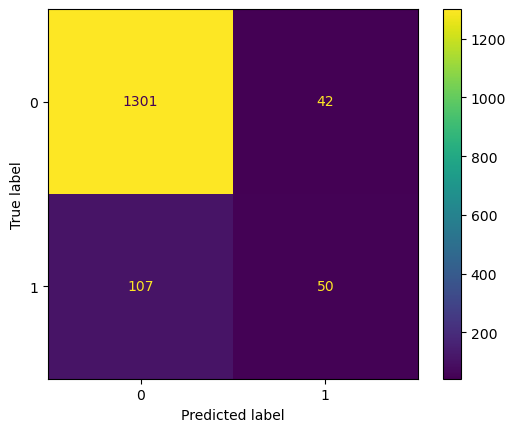

In [18]:
ConfusionMatrixDisplay.from_estimator(estimator = model_1, X = x_test, y = y_test);

**In this confusion matrix:**

- 1301 instances were correctly classified as 0 (True Negatives),

- 50 instances were correctly classified as 1 (True Positives),

- 42 instances were wrongly classified as 1 instead of 0 (False Positives),

- and 107 instances were wrongly classified as 0 instead of 1 (False Negatives).

### Using KNN Model

**This code segment demonstrates the process of training and evaluating a K-Nearest Neighbors (KNN) classifier using scikit-learn.**

**The segment demonstrates a complete workflow of training, testing, and evaluating a KNN classifier for a given dataset, with emphasis on reproducibility using random seed initialization.**

In [19]:
#numpy seed
np.random.seed(42)
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.89


In [20]:
y_pred = knn.predict(x_test)
 
confusion_matrix(y_test, y_pred)

array([[1288,   55],
       [ 110,   47]], dtype=int64)

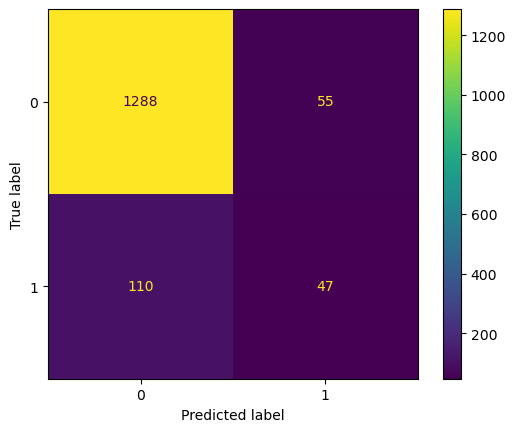

In [21]:
ConfusionMatrixDisplay.from_estimator(estimator = knn, X = x_test, y = y_test);

**In this confusion matrix:**
    
- 1288 instances were correctly classified as negative (True Negatives),

- 47 instances were correctly classified as positive (True Positives),

- 55 instances were wrongly classified as positive instead of negative (False Positives),

- and 110 instances were wrongly classified as negative instead of positive (False Negatives).


## Using Naive Bayes Model

**This code segment demonstrates the process of training and evaluating a Gaussian Naive Bayes classifier using scikit-learn.**

**This code segment demonstrates a complete workflow of training, testing, and evaluating a Gaussian Naive Bayes classifier for a given dataset. The accuracy score provides insight into the performance of the model in making predictions on unseen data.**

In [22]:
#define model
model_3 = GaussianNB()
 
#Fit model
model_3.fit(x_train, y_train)
 
#Score model
# Make predictions on the test set
y_pred = model_3.predict(x_test)
 
# Score the model on the testing data
accuracy = model_3.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9046666666666666


In [23]:
y_pred = model_3.predict(x_test)
 
confusion_matrix(y_test, y_pred)

array([[1260,   83],
       [  60,   97]], dtype=int64)

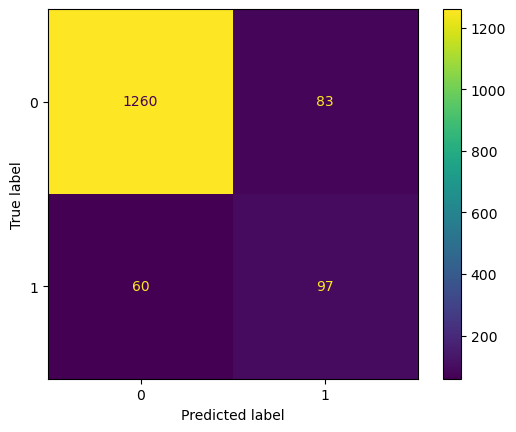

In [24]:
ConfusionMatrixDisplay.from_estimator(estimator = model_3, X = x_test, y = y_test);

**In this confusion matrix:**
- 1260 instances were correctly classified as negative (True Negatives),
- 97 instances were correctly classified as positive (True Positives),
- 83 instances were wrongly classified as positive instead of negative (False Positives),
- and 60 instances were wrongly classified as negative instead of positive (False Negatives).

## Using RandomForestClassifier

**This code segment demonstrates the process of training and evaluating a Random Forest classifier using scikit-learn.**

**Overall, this code segment demonstrates a complete workflow of training, testing, and evaluating a Random Forest classifier for a given dataset. The accuracy score provides insight into the performance of the model in making predictions on unseen data.**

In [25]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

np.random.seed(42)
#Define the model
model_4 =  RandomForestClassifier()
 
#Fit model
model_4.fit(x_train, y_train)
 
#Score model
# Make predictions on the test set
y_pred = model_4.predict(x_test)
 
# Score the model on the testing data
accuracy = model_4.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9906666666666667


In [26]:
y_pred = model_4.predict(x_test)
 
confusion_matrix(y_test, y_pred)

array([[1342,    1],
       [  13,  144]], dtype=int64)

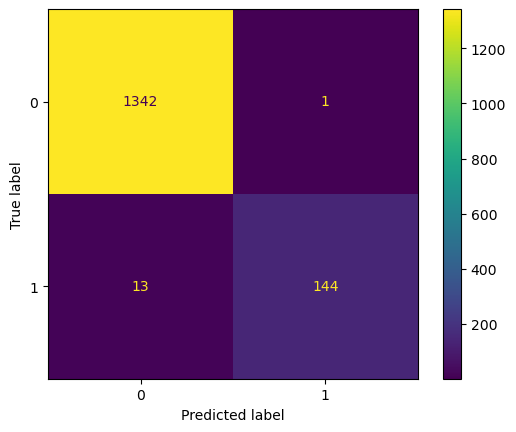

In [27]:
ConfusionMatrixDisplay.from_estimator(estimator = model_4, X = x_test, y = y_test);

**In this confusion matrix:**
- 1342 instances were correctly classified as negative (True Negatives),
- 144 instances were correctly classified as positive (True Positives),
- 1 instance was wrongly classified as positive instead of negative (False Positives),
- and 13 instances were wrongly classified as negative instead of positive (False Negatives).

In [28]:
model_4 = RandomForestClassifier()

# Save the model to a file
joblib.dump(model_4, 'RandomForestClassifier_model.pkl')

['RandomForestClassifier_model.pkl']

## Using Cross Validation

**Cross-validation is a method in machine learning to evaluate a model's performance and generalization ability. It divides the dataset into folds, training the model on one subset while testing it on the others iteratively. This approach reduces performance variability, offering a more reliable estimate. Common methods include k-fold, stratified k-fold, and leave-one-out cross-validation.**

In [29]:
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, solver='liblinear')
dt = RandomForestClassifier()
nv = GaussianNB()
models = {'KNN': knn, 'Logistic Regression': lr, 'Random Forest': dt, "Naive Bayes":nv}

def cross_validate_models(models, X, y, cv=4, scoring='accuracy'):
    """
    Perform cross-validation on multiple models using the specified data and return the evaluation scores.

    Parameters:
    - models: A dictionary where keys are model names and values are model objects.
    - X: The feature matrix.
    - y: The target vector.
    - cv: Number of folds for cross-validation. Default is 5.
    - scoring: The evaluation metric to use. Default is 'accuracy'.

    Returns:
    - scores_dict: A dictionary where keys are model names and values are arrays of evaluation scores for each fold.
    """
    scores_dict = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        scores_dict[model_name] = scores
    return scores_dict

models = {'KNN': knn, 'Logistic Regression': lr, 'Random Forest': dt,"Naive Bayes":nv}
scores_dict = cross_validate_models(models, X, y)
for model_name, scores in scores_dict.items():
    print(model_name, "Cross-validation scores:", scores)
    print(model_name, "Mean accuracy:", scores.mean())


KNN Cross-validation scores: [0.9008 0.9024 0.8928 0.9008]
KNN Mean accuracy: 0.8992
Logistic Regression Cross-validation scores: [0.9128 0.9072 0.9064 0.9056]
Logistic Regression Mean accuracy: 0.9079999999999999
Random Forest Cross-validation scores: [0.9848 0.9872 0.988  0.9888]
Random Forest Mean accuracy: 0.9872
Naive Bayes Cross-validation scores: [0.8976 0.904  0.8984 0.9008]
Naive Bayes Mean accuracy: 0.9002000000000001


**This provides an overview of the cross-validation scores and mean accuracies for four machine learning models:**

- K-Nearest Neighbors (KNN) achieved cross-validation scores ranging from 0.9008 to 0.9024, with a mean accuracy of 0.8992.
- Logistic Regression achieved cross-validation scores ranging from 0.9064 to 0.9128, with a mean accuracy of 0.908.
- Random Forest achieved cross-validation scores ranging from 0.9848 to 0.9888, with a mean accuracy of 0.9872.
- Naive Bayes achieved cross-validation scores ranging from 0.8976 to 0.904, with a mean accuracy of 0.9002.

These scores provide insights into the performance and generalization capabilities of each model, with Random Forest exhibiting the highest mean accuracy, followed by Logistic Regression, KNN, and Naive Bayes.

## Using RandomGridSearch 

**Randomized Grid Search is a hyperparameter tuning technique used in machine learning. It randomly samples a subset of hyperparameters from a defined grid or distribution, evaluating model performance for each combination through cross-validation. This method is computationally efficient and suitable for exploring large hyperparameter spaces, providing good results with less computational resources compared to traditional Grid Search.**

In [30]:
#We need to shuffle our data
df_shuffled = df.sample(frac=1)

# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
          
    return metric_dict      
          


In [31]:
#Split data into X and y
X = df_shuffled.drop(["ID","Personal Loan"] , axis = 1)
y = df_shuffled["Personal Loan"]

#Turn the Categeories into numbers
#One Hot Encoding is a process used to turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Education","Family"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X = transformer.fit_transform(X)
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

### Random GridSearch on Randomforestclassifier

In [32]:
# Define the grid of hyperparameters to search
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ['auto', 'sqrt', 'log2', None],  # Update max_features values
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)  # n_jobs is the amount of memory you want to give your Machine learning Model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,  # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; t

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sk

In [33]:
# Now lets see which estimators got the best result
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 10}

In [34]:
#Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the prediction
rs_metrics =evaluate_preds(y_test,rs_y_preds)

Accuracy:98.60%
Precision:0.96
Recall:0.90
F1 Score: 0.93


In [35]:
rs_y_preds =rs_clf.predict(X_test)
 
confusion_matrix(y_test, rs_y_preds)

array([[1347,    6],
       [  15,  132]], dtype=int64)

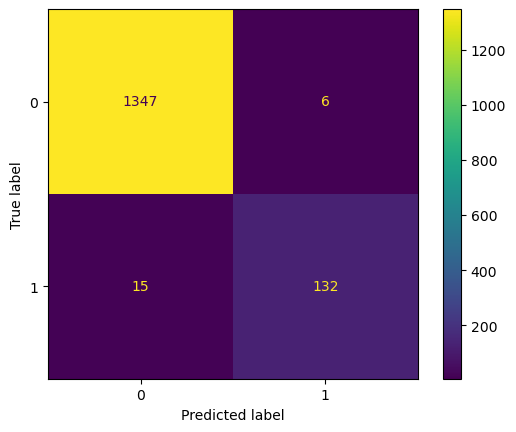

In [36]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_clf, X = X_test, y = y_test);

**In this confusion matrix:**
- 1347 instances were correctly classified as negative (True Negatives),
- 132 instances were correctly classified as positive (True Positives),
- 6 instances were wrongly classified as positive instead of negative (False Positives),
- and 15 instances were wrongly classified as negative instead of positive (False Negatives).

### Random GridSearch on Logistic Regression

In [37]:
grid_log ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
}
 
np.random.seed(42)
 
#Split data into train and test set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# Define model
model_1_1 = LogisticRegression(n_jobs = -1)
 
# Setup RandomizedSearchCV
rs_model_1_1 = RandomizedSearchCV(estimator = model_1_1,
                           param_distributions = grid_log,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_model_1_1.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   2.7s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, 

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. G

[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C

C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

In [38]:
# Now lets see which estimators got the best result
rs_model_1_1.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [39]:
#Make prediction with the best hyperparameters
rs_y_preds = rs_model_1_1.predict(X_test)

#Evaluate the prediction
rs_metrics =evaluate_preds(y_test,rs_y_preds)

Accuracy:96.13%
Precision:0.89
Recall:0.69
F1 Score: 0.78


In [40]:
rs_y_preds = rs_model_1_1.predict(X_test)
 
confusion_matrix(y_test, rs_y_preds)

array([[1340,   13],
       [  45,  102]], dtype=int64)

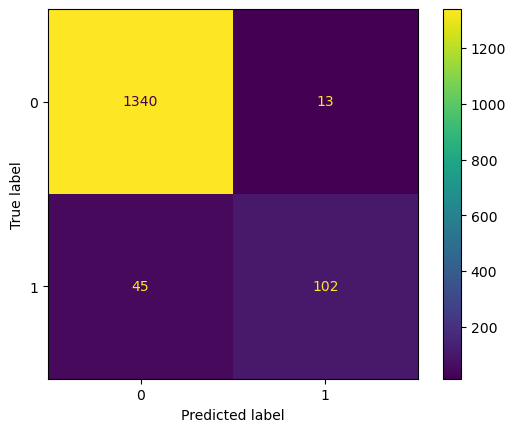

In [41]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_model_1_1, X = X_test, y = y_test)

**In this confusion matrix:**
- 1340 instances were correctly classified as negative (True Negatives),
- 102 instances were correctly classified as positive (True Positives),
- 13 instances were wrongly classified as positive instead of negative (False Positives),
- and 45 instances were wrongly classified as negative instead of positive (False Negatives).

## Random Grid Search on KNN

In [42]:
# Define the hyperparameter grid
grid = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': np.arange(10, 51),  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric (1: Manhattan distance, 2: Euclidean distance)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Setup RandomizedSearchCV
rs_knn = RandomizedSearchCV(estimator=knn,
                            param_distributions=grid,
                            n_iter=100,  # Number of models to try
                            cv=5,
                            verbose=2,
                            n_jobs=-1)  # Use all available CPU cores

# Fit the RandomizedSearchCV version of KNN
rs_knn.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", rs_knn.best_params_)

# Evaluate the model
accuracy = rs_knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 20, 'leaf_size': 48, 'algorithm': 'kd_tree'}
Accuracy: 0.9193333333333333


In [43]:
rs_y_preds = rs_knn.predict(X_test)
 
confusion_matrix(y_test, rs_y_preds)

array([[1367,    4],
       [ 117,   12]], dtype=int64)

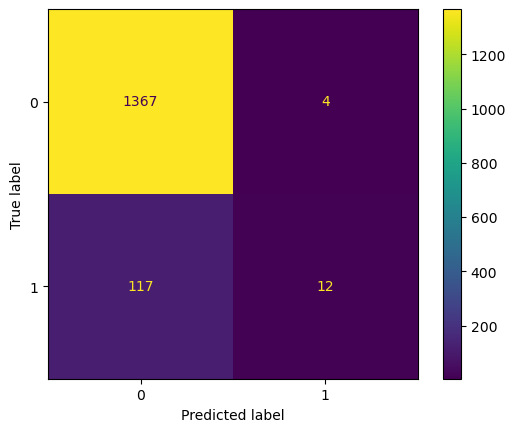

In [44]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_knn, X = X_test, y = y_test)

**This confusion matrix represents the performance of a binary classification model:**
- 1367 instances were correctly classified as negative (True Negatives).
- 12 instances were correctly classified as positive (True Positives).
- 4 instances were wrongly classified as positive instead of negative (False Positives).
- 117 instances were wrongly classified as negative instead of positive (False Negatives).

## Random Search Grid on Naive bayes

In [45]:
# Define the parameter grid for GaussianNB
grid = {
    'priors': [None],  # Use default priors
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Vary var_smoothing
}

# Instantiate GaussianNB
nb = GaussianNB()

# Setup RandomizedSearchCV
rs_nb = RandomizedSearchCV(
    estimator=nb,
    param_distributions=grid,
    n_iter=10,  # Number of models to try
    cv=5,
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV version of Naive Bayes
rs_nb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", rs_nb.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'var_smoothing': 1e-08, 'priors': None}


C:\Users\okeya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [46]:
rs_y_preds = rs_nb.predict(X_test)
 
confusion_matrix(y_test, rs_y_preds)

array([[1296,   75],
       [  41,   88]], dtype=int64)

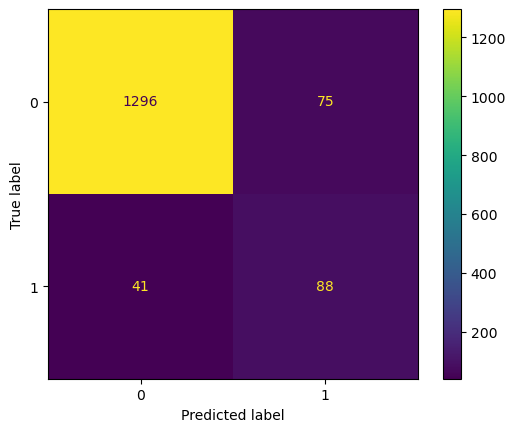

In [47]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_nb, X = X_test, y = y_test)

**In this confusion matrix:**

- 1296 instances were correctly classified as negative (True Negatives).
- 88 instances were correctly classified as positive (True Positives).
- 75 instances were wrongly classified as positive instead of negative (False Positives).
- 41 instances were wrongly classified as negative instead of positive (False Negatives).